In [ ]:
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
data=[[1,1],[2,9]]
np_data=np.array(data)
tensor_array=torch.tensor(data)
array=torch.from_numpy(np_data)
print(tensor_array)
print(array)

tensor([[1, 1],
        [2, 9]])
tensor([[1, 1],
        [2, 9]])


In [ ]:
# random tensor
rand_data=torch.rand(2,3)
rand_data

tensor([[0.5701, 0.4041, 0.4171],
        [0.7894, 0.9379, 0.4716]])

In [ ]:
torch.full((3,2),2)

tensor([[2, 2],
        [2, 2],
        [2, 2]])

In [ ]:
array1=torch.ones_like(tensor_array)
array0=torch.zeros(2,3)
print(array1)
print(array0)

tensor([[1, 1],
        [1, 1]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
print(rand_data.shape)
print(rand_data.dtype)
print(rand_data.device)

torch.Size([2, 3])
torch.float32
cpu


In [ ]:
data=torch.rand(4,5)
print(data)
print('first row',data[0])
print('first column',data[:,0])
print('last row',data[-1])
print('last column',data[:,-1])


tensor([[0.8400, 0.1322, 0.8868, 0.3940, 0.0424],
        [0.1727, 0.3070, 0.3627, 0.4385, 0.1445],
        [0.2868, 0.8807, 0.7326, 0.8827, 0.9757],
        [0.2037, 0.3397, 0.8816, 0.7747, 0.1881]])
first row tensor([0.8400, 0.1322, 0.8868, 0.3940, 0.0424])
first column tensor([0.8400, 0.1727, 0.2868, 0.2037])
last row tensor([0.2037, 0.3397, 0.8816, 0.7747, 0.1881])
last column tensor([0.0424, 0.1445, 0.9757, 0.1881])


In [ ]:
merged_data=torch.cat([data,data])

tensor([[0.8400, 0.1322, 0.8868, 0.3940, 0.0424],
        [0.1727, 0.3070, 0.3627, 0.4385, 0.1445],
        [0.2868, 0.8807, 0.7326, 0.8827, 0.9757],
        [0.2037, 0.3397, 0.8816, 0.7747, 0.1881],
        [0.8400, 0.1322, 0.8868, 0.3940, 0.0424],
        [0.1727, 0.3070, 0.3627, 0.4385, 0.1445],
        [0.2868, 0.8807, 0.7326, 0.8827, 0.9757],
        [0.2037, 0.3397, 0.8816, 0.7747, 0.1881]])

In [ ]:
print('matrix multiplication',data @ data.T)
print('elementwise multiplication',data*data)

matrix multiplication tensor([[1.6665, 0.6862, 1.3961, 1.3110],
        [0.6862, 0.4688, 1.1137, 0.8261],
        [1.3961, 1.1137, 3.1258, 1.8709],
        [1.3110, 0.8261, 1.8709, 1.5697]])
elementwise multiplication tensor([[0.7056, 0.0175, 0.7864, 0.1552, 0.0018],
        [0.0298, 0.0942, 0.1316, 0.1922, 0.0209],
        [0.0823, 0.7756, 0.5367, 0.7792, 0.9520],
        [0.0415, 0.1154, 0.7773, 0.6001, 0.0354]])


In [ ]:
print('Tensor to numpy', data.numpy())

Tensor to numpy [[0.8399788  0.13217694 0.88679206 0.39399087 0.04235423]
 [0.17274076 0.3069902  0.3627017  0.43845367 0.1445468 ]
 [0.28679734 0.8806912  0.73261565 0.8827128  0.97572386]
 [0.20368642 0.33974612 0.8816356  0.77469033 0.1880945 ]]


# MNIST Data training

The primary purpose of using a DataLoader is to efficiently feed data to your model during training. It handles tasks like batching, shuffling, and potentially loading data in parallel, making your training process more organized and optimized.

In [ ]:
# first converts image to a PyTorch tensor and then normalizes its pixel values
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5))])

trainset=datasets.MNIST('MNIST_data/',download=True,transform=transform,train=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.9MB/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.94MB/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.0MB/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.72MB/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
dataiter=iter(trainloader)
images,labels=next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


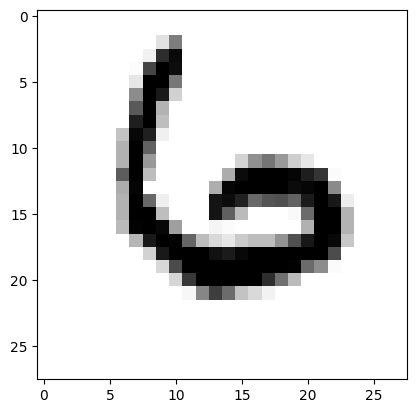

In [ ]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

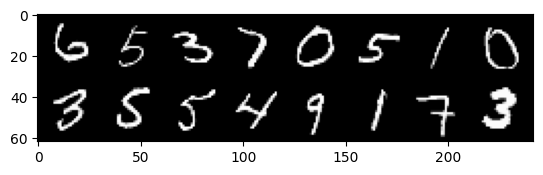

In [ ]:
from torchvision.utils import make_grid
grid = make_grid(images[:16])
plt.imshow(grid.permute(1, 2, 0))

In [ ]:
# Define the neural network model
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
      x=F.sigmoid(self.hidden(x))
      x=F.softmax(self.output(x),dim=1)
      return x

model=Network()

In [ ]:
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

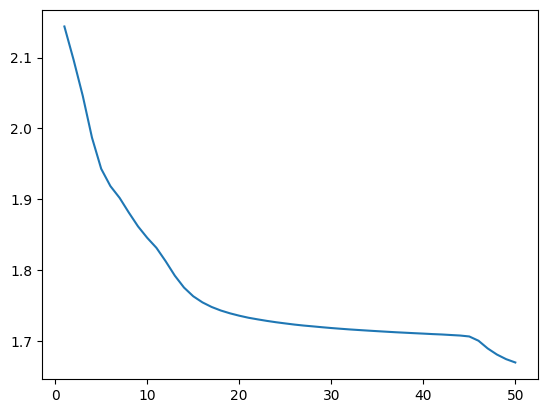

In [ ]:
criterion = nn.CrossEntropyLoss() # The cross entropy loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01) # The stochastic gradient descent optimizer

flatten = nn.Flatten()

epochs=50
train_loses=[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    flat_image = flatten(images)

    optimizer.zero_grad()   # clear gradients during multiple forward and backward pass - gradients accumualtes

    logits=model.forward(flat_image)
    loss=criterion(logits,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
  else:
    epoch_loss= running_loss/len(trainloader)
    train_loses.append(epoch_loss)

plt.plot(range(1,epochs+1),train_loses)

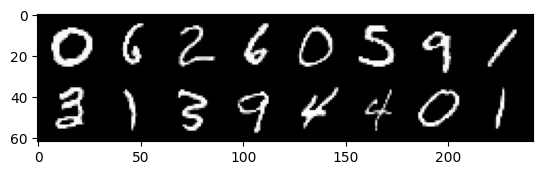

In [ ]:
from torchvision.utils import make_grid
grid = make_grid(images[:16])
plt.imshow(grid.permute(1, 2, 0))

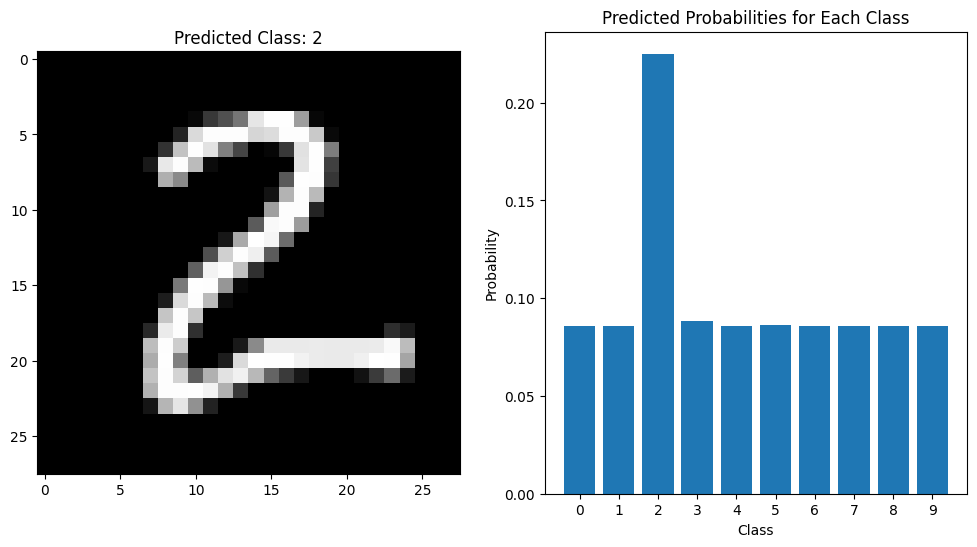

In [ ]:
img=images[2].view(1,784)
with torch.no_grad():
  logits=model.forward(img)

ps=F.softmax(logits,dim=1)

_, predicted_class = ps.max(1)
predicted_class = predicted_class.item()
probabilities = ps.cpu().numpy()[0]
class_labels = np.arange(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(img.view(28, 28).cpu().numpy(), cmap='gray')
ax1.set_title(f"Predicted Class: {predicted_class}")

ax2.bar(class_labels, probabilities)
ax2.set_xlabel("Class")
ax2.set_ylabel("Probability")
ax2.set_title("Predicted Probabilities for Each Class")
ax2.set_xticks(class_labels)

plt.show()

# Fashion MNIST

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5))])
train=datasets.FashionMNIST('data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(train,batch_size=64,shuffle=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 299kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.2MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
dataiter=iter(trainloader)
images,labels=next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


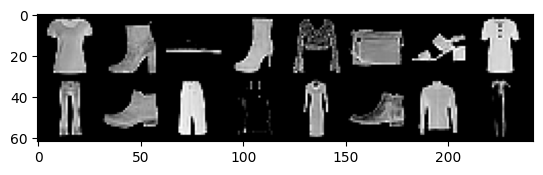

In [ ]:
from torchvision.utils import make_grid
grid = make_grid(images[:16])
plt.imshow(grid.permute(1, 2, 0))

In [ ]:
# Define the neural network model
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256,128)
        self.hidden3 = nn.Linear(128,64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):

      flatten = nn.Flatten()
      x = x.view(x.shape[0], -1)

      x=F.relu(self.hidden1(x))
      x=F.relu(self.hidden2(x))
      x=F.relu(self.hidden3(x))
      x=F.log_softmax(self.output(x),dim=1)
      return x

model=Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

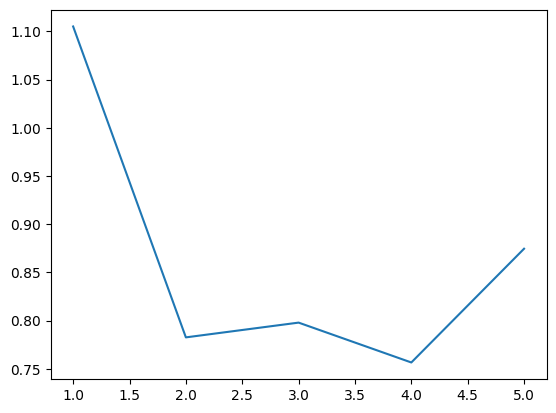

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
flatten = nn.Flatten()
epochs=5
train_loses=[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    flat_image = flatten(images)
    logits=model.forward(flat_image)
    loss=criterion(logits,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
  else:
    epoch_loss= running_loss/len(trainloader)
    train_loses.append(epoch_loss)

plt.plot(range(1,epochs+1),train_loses)

In [ ]:
test_data = datasets.FashionMNIST(root="'data/",train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(test_data,batch_size=64,shuffle=True)

In [ ]:
dataiter=iter(testloader)
images,labels=next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
model.eval()
size = len(testloader.dataset)
num_batches = len(testloader)
test_loss, correct = 0, 0

with torch.no_grad():
    for X, y in testloader:
        pred = model(X)
        test_loss += criterion(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

test_loss /= num_batches
correct /= size
print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Test Error: 
 Accuracy: 63.9%, Avg loss: 0.881368 



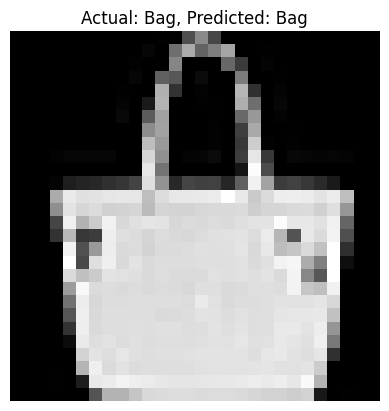

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

with torch.no_grad():
    pred = model(images[0].unsqueeze(0))
    predicted_class = pred.argmax(1).item()
    actual_class = labels[0].item()

image = images[0].permute(1, 2, 0).numpy()  # Adjust shape if needed (C, H, W) → (H, W, C)

plt.imshow(image, cmap="gray")
plt.title(f"Actual: {class_labels[actual_class]}, Predicted: {class_labels[predicted_class]}")
plt.axis("off")
plt.show()